<a href="https://colab.research.google.com/github/bahmad6890/machine-learning/blob/master/Prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline 

In [102]:
# fix random seed for reproducibility
np.random.seed(7)

In [103]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [104]:
#data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/HealtyNormalized.csv")
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/filteredlpf/Healthy.csv")

#data = pd.read_csv('HealtyNormalized.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014434 entries, 0 to 1014433
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   speed          1014434 non-null  float64
 1   vibration      1014434 non-null  float64
 2   vibration_LPF  1014434 non-null  float64
 3   vibration_SMA  1014434 non-null  float64
 4   Faults         1014434 non-null  object 
dtypes: float64(4), object(1)
memory usage: 38.7+ MB


In [105]:
data.head()

,speed,vibration,vibration_LPF,vibration_SMA,Faults
0,0.036346,0.004049,0.001461,-0.000680,Healthy
1,0.037003,0.003720,0.001771,-0.000562,Healthy
2,0.036346,0.005693,0.002131,-0.000411,Healthy
3,0.036346,0.005035,0.002511,-0.000279,Healthy
4,0.036017,0.005693,0.002900,-0.000128,Healthy


In [106]:
vibration = data['vibration_LPF']
#vibration = data['vbH']
vibration = pd.DataFrame(vibration)
vibration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014434 entries, 0 to 1014433
Data columns (total 1 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   vibration_LPF  1014434 non-null  float64
dtypes: float64(1)
memory usage: 7.7 MB


In [107]:
vibration.head()

,vibration_LPF
0,0.001461
1,0.001771
2,0.002131
3,0.002511
4,0.002900


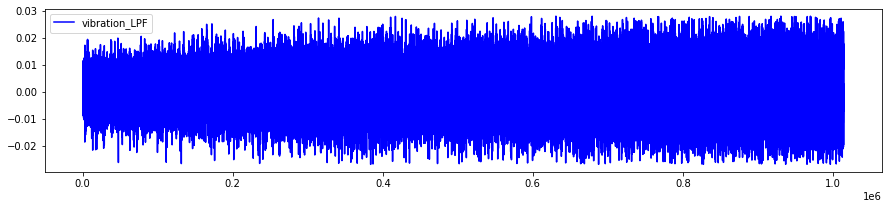

In [108]:
dataset = vibration.plot(color='b',figsize = (15,3))

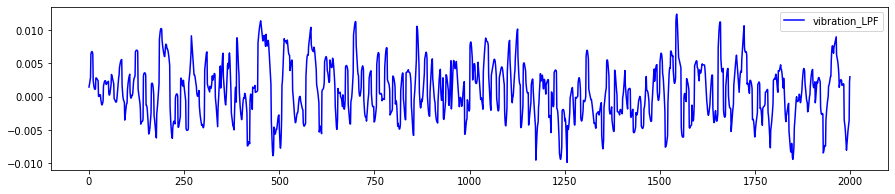

In [109]:
dataset = vibration.iloc[0:2000].plot(color='b',figsize = (15,3))

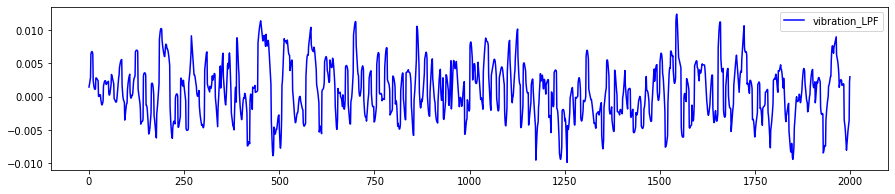

In [110]:
smallDataset = vibration.iloc[0:2000]
smallDataset.plot(color='b',figsize = (15,3))

In [111]:
smallDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   vibration_LPF  2000 non-null   float64
dtypes: float64(1)
memory usage: 15.8 KB


In [112]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedVibration = scaler.fit_transform(smallDataset)
normalizedVibration = pd.DataFrame(normalizedVibration)

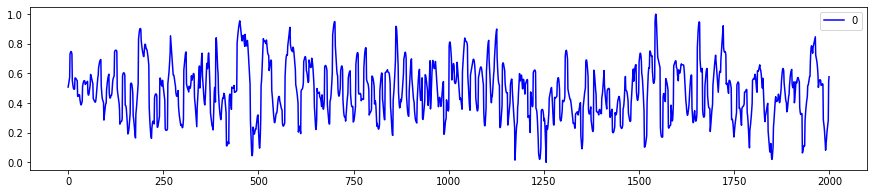

In [113]:
normalizedVibration.plot(color='b',figsize = (15,3))

In [114]:
dataset = normalizedVibration
dataset = pd.DataFrame(dataset)
dataset.tail()

,0
1995,0.238066
1996,0.260276
1997,0.283547
1998,0.543680
1999,0.577536


In [115]:
# split into train and test sets
# split into train and test sets
"""from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size = 0.33)"""


# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

print("Total Dataset   = ", len(dataset))
print("Training Smaple = ", train_size)
print("Testing Sample  = ", test_size)

Total Dataset   =  2000
Training Smaple =  1340
Testing Sample  =  660


In [116]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset.iloc[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset.iloc[i + look_back])
    return np.array(dataX), np.array(dataY)

In [117]:
test[0].iloc[1:6]

1341    0.332488
1342    0.348793
1343    0.366625
1344    0.383382
1345    0.396331
Name: 0, dtype: float64

In [118]:
test[0].describe()

count    660.000000
mean       0.460527
std        0.184414
min        0.020218
25%        0.327994
50%        0.465316
75%        0.588445
max        1.000000
Name: 0, dtype: float64

In [119]:
# reshape into X=t and Y=t+1
look_back = 20
trainX, trainY = create_dataset(train[0], look_back)
testX, testY   = create_dataset(test[0], look_back)

In [120]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



In [121]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
1319/1319 - 4s - loss: 0.0876
Epoch 2/20
1319/1319 - 2s - loss: 0.0643
Epoch 3/20
1319/1319 - 2s - loss: 0.0580
Epoch 4/20
1319/1319 - 2s - loss: 0.0542
Epoch 5/20
1319/1319 - 2s - loss: 0.0505
Epoch 6/20
1319/1319 - 2s - loss: 0.0500
Epoch 7/20
1319/1319 - 2s - loss: 0.0456
Epoch 8/20
1319/1319 - 2s - loss: 0.0440
Epoch 9/20
1319/1319 - 2s - loss: 0.0420
Epoch 10/20
1319/1319 - 2s - loss: 0.0405
Epoch 11/20
1319/1319 - 2s - loss: 0.0398
Epoch 12/20
1319/1319 - 2s - loss: 0.0385
Epoch 13/20
1319/1319 - 2s - loss: 0.0388
Epoch 14/20
1319/1319 - 2s - loss: 0.0371
Epoch 15/20
1319/1319 - 2s - loss: 0.0369
Epoch 16/20
1319/1319 - 2s - loss: 0.0364
Epoch 17/20
1319/1319 - 2s - loss: 0.0365
Epoch 18/20
1319/1319 - 2s - loss: 0.0361
Epoch 19/20
1319/1319 - 2s - loss: 0.0366
Epoch 20/20
1319/1319 - 2s - loss: 0.0359


In [122]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate mean_absolute_error
print('Train Score: MAE',mean_absolute_error(trainY[0], trainPredict[:,0]))
print('Test Score: MAE',mean_absolute_error(testY[0], testPredict[:,0]))

Train Score: MAE 0.0007915455440101596
Test Score: MAE 0.0007654228551936169


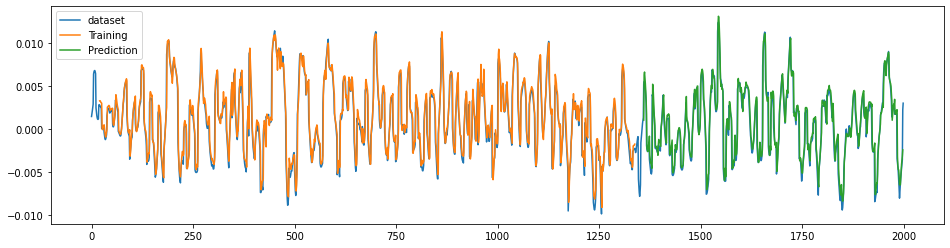

In [123]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(16, 4))
plt.plot(scaler.inverse_transform(dataset),label='dataset')
plt.plot(trainPredictPlot, label='Training')
plt.plot(testPredictPlot,label='Prediction')
plt.legend();
plt.show()
